In [4]:
import time
import pandas as pd
import numpy as np

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split


data = pd.read_csv('version4.csv',encoding="utf-8")

#preu_park_noinclos
#preu_park_noinclos=((data['hasParkingSpace']!=data['isParkingSpaceIncludedInPrice']).astype(float))
#data=pd.concat((data,preu_park_noinclos),axis=1)
#data.drop("isParkingSpaceIncludedInPrice",axis=1)

data.columns

Index([u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'price', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'priceperarea', u'type_chalet',
       u'type_chalet_independantHouse', u'type_chalet_semidetachedHouse',
       u'type_chalet_terracedHouse', u'type_flat', u'type_flat_duplex',
       u'type_flat_penthouse', u'type_flat_studio', u'good', u'newdevelopment',
       u'renew'],
      dtype='object')

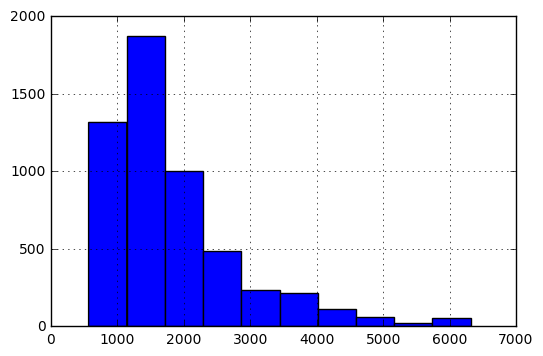

In [5]:
%matplotlib inline
data['price'].hist()

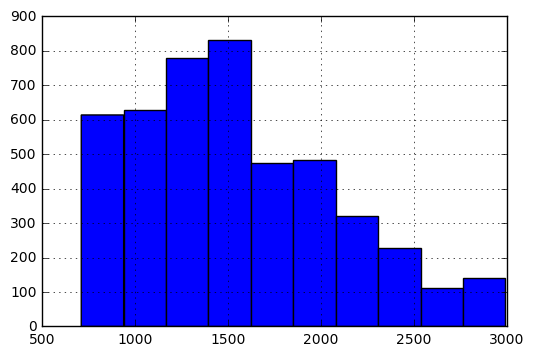

In [6]:
#Remove outliers


per=np.percentile(np.array(data['price']), [2.5, 89])
data=data[data['price']>per[0]]
data=data[data['price']<per[1]]

data['price'].hist()

In [7]:
y =data['price']
X = data.drop(['price'], axis=1)
X=np.array(X)
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [8]:
#Linear regression

# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'normalize' : [True,False]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(LinearRegression(fit_intercept=True), tuned_parameters, cv=10, scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."



Best parameters set found on training set:

{'normalize': True}

Mean Absolute Error:

343.544927733

The model is trained on the training set. The scores are computed on the testing set.


In [9]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [200, 500, 600, 750], 'max_features': ["auto", "sqrt", "log2"]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'max_features': 'sqrt', 'n_estimators': 750, 'bootstrap': False}

Mean Absolute Error:

240.151970627

The model is trained on the training set. The scores are computed on the testing set.
--- 529.187796116 seconds ---


In [12]:
#Random Forest Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
#tuned_parameters = [{'bootstrap': [True, False],'criterion': ["gini", "entropy"],'n_estimators': [10, 50, 100, 200, 500]}]
tuned_parameters = [{'bootstrap': [True, False],
                     'n_estimators': [650, 700, 750, 800, 850], 'max_features': ["auto", "sqrt", "log2"]}]
#scores = ['precision', 'recall']

#scores = ['precision']
#scores = ['f1']

#print "Tuning hyper-parameters for %s" % score
print
clf = GridSearchCV(RandomForestRegressor(n_estimators=10, random_state=44, n_jobs=-1), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))


Best parameters set found on training set:

{'max_features': 'sqrt', 'n_estimators': 750, 'bootstrap': False}

Mean Absolute Error:

240.151970627

The model is trained on the training set. The scores are computed on the testing set.
--- 923.916563988 seconds ---


In [13]:
#score with best parameters

from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor(n_estimators=750, max_features='sqrt', bootstrap=False, random_state=44, n_jobs=-1)
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [14]:
scores=np.abs(scores)
print scores
print np.mean(scores)
print np.std(scores)

[ 196.19048918  244.14091101  232.0418836   219.91305243  258.11367992
  241.94351844  219.45594987  276.25658568  257.13583369  216.26348711]
236.145539093
22.7600709126


In [24]:
#RF feature selection

print X.shape

from sklearn.feature_selection import SelectFromModel

clf = RandomForestRegressor(n_estimators=750, max_features='sqrt', bootstrap=False, random_state=44, n_jobs=-1)
clf = clf.fit(X, y)
print clf.feature_importances_

m=np.mean(clf.feature_importances_)
print m*0.1
model = SelectFromModel(clf, threshold=m*0.1, prefit=True)

#model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)
print X_new.shape
print data.columns

(4614, 22)
[  7.18128606e-02   1.20322839e-01   1.22104390e-02   1.79162064e-02
   2.58644807e-01   6.01586834e-02   1.20917356e-01   1.46451957e-01
   1.08929996e-02   8.14708523e-03   1.28679186e-01   1.54632413e-04
   1.07386859e-03   3.00186939e-04   3.92680004e-04   7.03040127e-03
   4.31660018e-03   4.64470729e-03   4.88652201e-03   1.95444264e-02
   1.05052559e-04   1.39650305e-03]
0.00454545454545
(4614, 15)
Index([u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'price', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'priceperarea', u'type_chalet',
       u'type_chalet_independantHouse', u'type_chalet_semidetachedHouse',
       u'type_chalet_terracedHouse', u'type_flat', u'type_flat_duplex',
       u'type_flat_penthouse', u'type_flat_studio', u'good', u'newdevelopment',
       u'renew'],
      dtype='object')


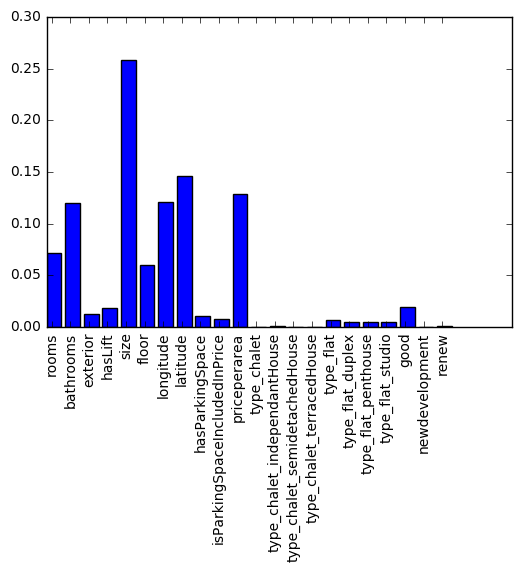

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
ind = np.arange(X.shape[1]) 
plt.bar(ind, clf.feature_importances_)
width = 0.55 
plt.xticks(ind + width/2., (u'rooms', u'bathrooms', u'exterior', u'hasLift', u'size', u'floor',
       u'longitude', u'latitude', u'hasParkingSpace',
       u'isParkingSpaceIncludedInPrice', u'priceperarea', u'type_chalet',
       u'type_chalet_independantHouse', u'type_chalet_semidetachedHouse',
       u'type_chalet_terracedHouse', u'type_flat', u'type_flat_duplex',
       u'type_flat_penthouse', u'type_flat_studio', u'good', u'newdevelopment',
       u'renew'), rotation='vertical')
plt.show()

In [27]:
#RandomForestRegressor FS
print X.shape
k=0
my_threshold=0.1
while k<X.shape[1]:
    y =data['price']
    X = data.drop(['price'], axis=1)
    X=np.array(X)
    y=np.array(y)
    
    clf = RandomForestRegressor(n_estimators=750, max_features='sqrt', bootstrap=False, random_state=44, n_jobs=-1)
    model = SelectFromModel(clf, threshold=my_threshold, prefit=False)
    model.fit(X, y)
    X_new = model.transform(X)

    k=X_new.shape[1]
    print "N of features: " + str(k)
    print 
    my_threshold=my_threshold-0.01
    
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_new, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    scores=np.abs(scores)
    print "Scores: "
    print scores
    print "Mean: "
    print np.mean(scores)
    print "Std: "
    print np.std(scores)
    print "-----------------------"

(4614, 22)
N of features: 5

Scores: 
[ 231.10369305  276.43406816  270.99623425  253.14966921  309.1378567
  259.79612099  258.0851948   331.73581242  272.52137651  257.90607603]
Mean: 
272.086610211
Std: 
27.454491552
-----------------------
N of features: 5

Scores: 
[ 231.10369305  276.43406816  270.99623425  253.14966921  309.1378567
  259.79612099  258.0851948   331.73581242  272.52137651  257.90607603]
Mean: 
272.086610211
Std: 
27.454491552
-----------------------
N of features: 5

Scores: 
[ 231.10369305  276.43406816  270.99623425  253.14966921  309.1378567
  259.79612099  258.0851948   331.73581242  272.52137651  257.90607603]
Mean: 
272.086610211
Std: 
27.454491552
-----------------------
N of features: 6

Scores: 
[ 201.53374315  255.00623617  248.99133457  227.16049928  276.87722102
  243.57863582  239.38259317  307.4456028   257.57285515  233.64252591]
Mean: 
249.119124702
Std: 
27.1849257308
-----------------------
N of features: 7

Scores: 
[ 198.44281     247.7839822 

# Gradient Boosting Regressor (no ejecutado)

In [10]:
#scaled

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

#Tenemos que normalizar y??????

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators':[100, 200, 500, 600, 750], 
                     'learning_rate':[0.1,0.2,0.3,0.5],'max_depth':[1,2,3,4,5], 
                     'loss':['ls', 'lad', 'huber', 'quantile'], 'max_features':["auto", "sqrt", "log2"]}]

clf = GridSearchCV(GradientBoostingRegressor(criterion='friedman_mse', random_state=44), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 215 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1815 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2465 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3215 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4065 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 5015 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 6065 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 7215 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 8465 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 9815 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 11265 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed: 

Best parameters set found on training set:

{'max_features': 'sqrt', 'loss': 'huber', 'learning_rate': 0.1, 'n_estimators': 750, 'max_depth': 5}

Mean Absolute Error:

251.233762088

The model is trained on the training set. The scores are computed on the testing set.
--- 2665.17582607 seconds ---


In [23]:
#score with best parameters

from sklearn.model_selection import cross_val_score
clf = GradientBoostingRegressor(n_estimators=750,learning_rate=0.1, max_depth=5, loss='huber',
                                max_features='sqrt', random_state=44)
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [24]:
scores=np.abs(scores)
print scores
print np.mean(scores)
print np.std(scores)

[ 206.31053341  272.56325731  268.83152568  244.48669136  272.06948688
  267.0919594   244.14311458  298.34532781  287.67843379  240.45890692]
260.197923714
25.3463695763


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
#Gradient Boosting Regressor
#n_estimators estimate

start_time = time.time()
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators':[700, 750, 800, 850], 
                     'learning_rate':[0.1,0.2,0.3],'max_depth':[4,5,6,7,9,11], 
                     'loss':['ls', 'lad', 'huber'], 'max_features':["auto", "sqrt", "log2"]}]

clf = GridSearchCV(GradientBoostingRegressor(criterion='friedman_mse', random_state=44), tuned_parameters, cv=10, 
                   scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print "Best parameters set found on training set:"
print
print clf.best_params_ 
print
y_true, y_pred = y_test, clf.predict(X_test)
#y_true=y_true.astype('float64')
#print "Confusion matrix:"
#print
#print confusion_matrix(y_true, y_pred)
#print
#print "Classification report:"
#print classification_report(y_true, y_pred)
print "Mean Absolute Error:"
print
print metrics.mean_absolute_error(y_true, y_pred)
print
print "The model is trained on the training set. The scores are computed on the testing set."
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 79.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 123.9min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 143.2min finished


Best parameters set found on training set:

{'max_features': 'log2', 'loss': 'lad', 'learning_rate': 0.1, 'n_estimators': 750, 'max_depth': 11}

Mean Absolute Error:

252.178816469

The model is trained on the training set. The scores are computed on the testing set.
--- 8596.99742603 seconds ---


In [26]:
#score with best parameters

from sklearn.model_selection import cross_val_score
clf = GradientBoostingRegressor(n_estimators=750,learning_rate=0.1, max_depth=11, loss='lad',
                                max_features='log2', random_state=44)
scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

In [27]:
scores=np.abs(scores)
print scores
print np.mean(scores)
print np.std(scores)

[ 211.00114155  260.50452065  264.65932486  240.94345072  277.17581778
  275.67717264  232.83151344  304.45158772  289.33842983  222.40172925]
257.898468844
28.7594609074
